# Final categories to do the CellViT training

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
annots = pd.read_csv('/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/adata_compare_annots.csv')
annots['tissue'] = annots['slide_id'].apply(lambda x: x.rsplit('_', 1)[0])
annots

,slide_id,cell_id,label1_nuclei,final_label_nuclei,label1_cells,final_label_cells,PanNuke_label,PanNuke_proba,final_label_combined,tissue
0,bone_marrow_s0,aaaaaaaa-1,B_blast,B_Plasma,Fibroblast,Fibroblast_Myofibroblast,Inflammatory,0.416268,Fibroblast_Myofibroblast,bone_marrow
1,bone_marrow_s0,aaaaaaab-1,T,T_NK,B_progenitor,B_Plasma,Neoplastic,0.311243,B_Plasma,bone_marrow
2,bone_marrow_s0,aaaaaaac-1,less10,Less10,less10,Less10,Neoplastic,0.754624,Less10,bone_marrow
3,bone_marrow_s0,aaaaaaad-1,Proliferating_leukemic_blast,Stem_like,B_progenitor,B_Plasma,Neoplastic,0.421805,B_Plasma,bone_marrow
4,bone_marrow_s0,aaaaaaae-1,less10,Less10,less10,Less10,Neoplastic,0.347782,Less10,bone_marrow
...,...,...,...,...,...,...,...,...,...,...
11207684,lung_s3,aaaeddac-1,Unknown,Unknown,Unknown,Unknown,Connective,0.866211,Less10,lung
11207685,lung_s3,aaaeddad-1,less10,Less10,Unknown,Unknown,Connective,0.378378,Less10,lung
11207686,lung_s3,aaaeddae-1,Epithelial,Epithelial,Unknown,Unknown,Inflammatory,0.680428,Less10,lung
11207687,lung_s3,aaaeddaf-1,less10,Less10,less10,Less10,Background,1.000000,Less10,lung


## ct_1

**===> Choosing table_cells**

In [3]:
kept_slide_ids = annots['slide_id'].unique()

# Remove "brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"
kept_slide_ids = [x for x in kept_slide_ids if x not in ["brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"]]
print("Slide_ids:", kept_slide_ids)
print("Number:", len(kept_slide_ids))
print("Tissues:", annots[annots['slide_id'].isin(kept_slide_ids)]['tissue'].unique())

Slide_ids: ['breast_s0', 'breast_s1', 'breast_s3', 'cervix_s0', 'colon_s1', 'colon_s2', 'heart_s0', 'kidney_s0', 'kidney_s1', 'liver_s0', 'liver_s1', 'breast_s6', 'lymph_node_s0', 'ovary_s0', 'ovary_s1', 'pancreatic_s0', 'pancreatic_s1', 'pancreatic_s2', 'prostate_s0', 'skin_s1', 'skin_s2', 'skin_s3', 'skin_s4', 'tonsil_s0', 'tonsil_s1', 'lung_s1', 'lung_s3']
Number: 27
Tissues: ['breast' 'cervix' 'colon' 'heart' 'kidney' 'liver' 'lymph_node' 'ovary'
 'pancreatic' 'prostate' 'skin' 'tonsil' 'lung']


In [4]:
annots.loc[annots['slide_id'].isin(kept_slide_ids), 'final_label_cells'].unique()

array(['Epithelial', 'Blood_vessel', 'T_NK', 'Myeloid', 'B_Plasma',
       'Fibroblast_Myofibroblast', 'Specialized', 'Less10', 'Unknown',
       'Stem_like', 'Melanocyte'], dtype=object)

In [5]:
# Keep only selected slide_ids
annots_ct_1 = annots[annots['slide_id'].isin(kept_slide_ids)]

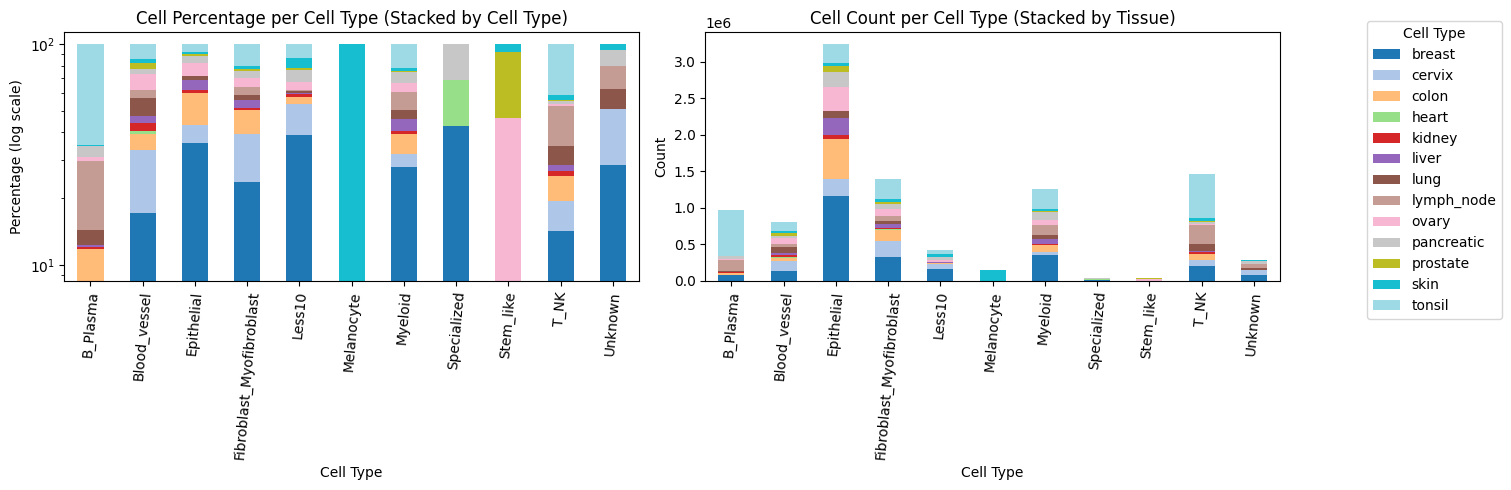

In [6]:
# Cell count per cell type and tissue

df_cell_type_stacked = annots_ct_1.groupby(['final_label_cells', 'tissue']).size().unstack(fill_value=0)

# Calculate percentage per cell type by tissue
df_cell_type_percentage = df_cell_type_stacked.div(df_cell_type_stacked.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot 1: Stacked bar plot with percentages and log scale
df_cell_type_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Cell Type (Stacked by Cell Type)')
ax1.set_yscale('log')
ax1.set_xlabel('Cell Type')
ax1.set_ylabel('Percentage (log scale)')
ax1.set_xticklabels(df_cell_type_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with counts
df_cell_type_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Cell Type (Stacked by Tissue)')
ax2.set_xlabel('Cell Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_cell_type_stacked.index, rotation=85)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.65), loc='center left')

plt.tight_layout()
plt.show()

In [6]:
label2cat = {"T_NK" : "T_NK",
             "B_Plasma" : "B_Plasma",
             "Myeloid" : "Myeloid",
             "Blood_vessel" : "Blood_vessel",
             "Fibroblast_Myofibroblast" : "Fibroblast_Myofibroblast",
             "Epithelial" : "Epithelial",
             "Specialized" : "Specialized",
             "Melanocyte" : "Melanocyte",
             "Stem_like" : "Dead",
             "Unknown" : "Dead",
             "Less10" : "Dead"
           }


cat2idx = {"T_NK" : 0,
          "B_Plasma" : 1,
          "Myeloid" : 2,
          "Blood_vessel" : 3,
          "Fibroblast_Myofibroblast" : 4,
          "Epithelial" : 5,
          "Specialized" : 6,
          "Melanocyte" : 7,
          "Dead" : 8
          }


cat2color = {"T_NK" : [255, 15, 15],                    # Red
          "B_Plasma" : [255, 143, 15],                  # Orange
          "Myeloid" : [255, 211, 15],                   # Yellow
          "Blood_vessel" : [70, 128, 0],                # Dark Green
          "Fibroblast_Myofibroblast" : [156, 255, 36],  # Light Green
          "Epithelial" : [57, 208, 133],                # Blue Green
          "Specialized" : [69, 237, 255],               # Turquoise
          "Melanocyte" : [22, 169, 223],                # Blue
          "Dead" : [143, 143, 143]                      # Grey
          }

In [8]:
# Save dict label2cat in json file
with open("/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_1/label2cat.json", "w") as f:
    json.dump(label2cat, f)

# Save dict cat2idx in json file
with open("/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_1/cat2idx.json", "w") as f:
    json.dump(cat2idx, f)

# Save dict cat2color in json file
with open("/Volumes/SAUV_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_1/cat2color.json", "w") as f:
    json.dump(cat2color, f)

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_6101/3151342479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annots_ct_1['final_label_training_ct_1'] = annots_ct_1['final_label_cells'].map(label2cat)


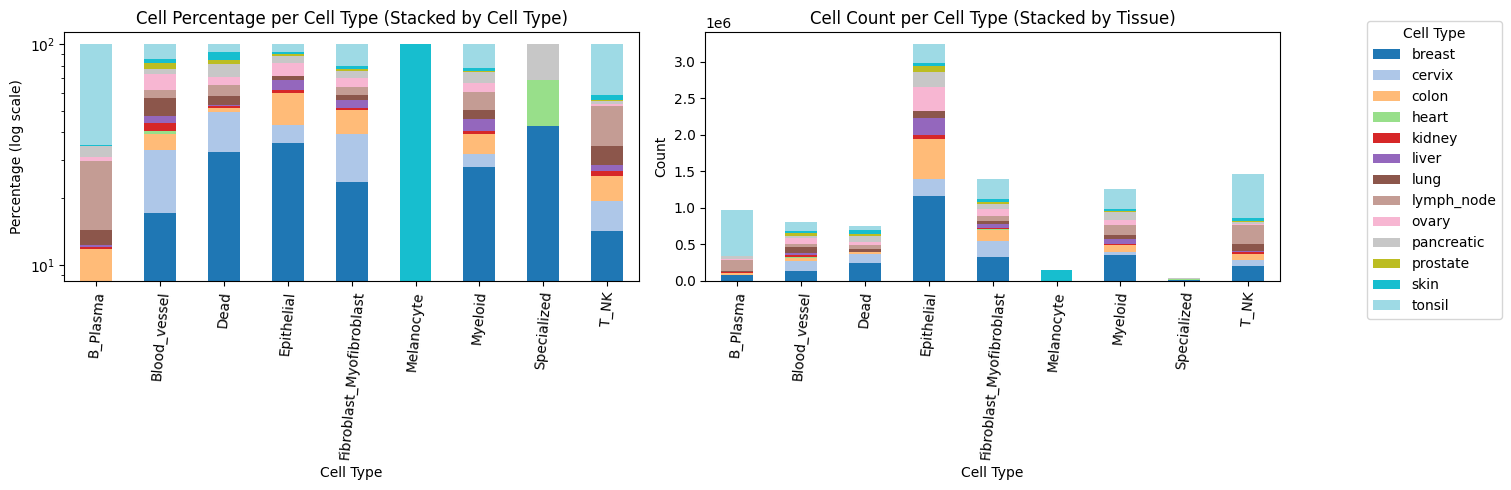

In [7]:
# Cell count per cell type and tissue

annots_ct_1['final_label_training_ct_1'] = annots_ct_1['final_label_cells'].map(label2cat)

df_cell_type_stacked = annots_ct_1.groupby(['final_label_training_ct_1', 'tissue']).size().unstack(fill_value=0)

# Calculate percentage per cell type by tissue
df_cell_type_percentage = df_cell_type_stacked.div(df_cell_type_stacked.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot 1: Stacked bar plot with percentages and log scale
df_cell_type_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Cell Type (Stacked by Cell Type)')
ax1.set_yscale('log')
ax1.set_xlabel('Cell Type')
ax1.set_ylabel('Percentage (log scale)')
ax1.set_xticklabels(df_cell_type_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with counts
df_cell_type_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Cell Type (Stacked by Tissue)')
ax2.set_xlabel('Cell Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_cell_type_stacked.index, rotation=85)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.65), loc='center left')

plt.tight_layout()
plt.show()

## ct_2

**===> Choosing table_cells**

In [3]:
kept_slide_ids = annots['slide_id'].unique()

# Remove "brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"
kept_slide_ids = [x for x in kept_slide_ids if x not in ["brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"]]
print("Slide_ids:", kept_slide_ids)
print("Number:", len(kept_slide_ids))
print("Tissues:", annots[annots['slide_id'].isin(kept_slide_ids)]['tissue'].unique())

Slide_ids: ['breast_s0', 'breast_s1', 'breast_s3', 'cervix_s0', 'colon_s1', 'colon_s2', 'heart_s0', 'kidney_s0', 'kidney_s1', 'liver_s0', 'liver_s1', 'breast_s6', 'lymph_node_s0', 'ovary_s0', 'ovary_s1', 'pancreatic_s0', 'pancreatic_s1', 'pancreatic_s2', 'prostate_s0', 'skin_s1', 'skin_s2', 'skin_s3', 'skin_s4', 'tonsil_s0', 'tonsil_s1', 'lung_s1', 'lung_s3']
Number: 27
Tissues: ['breast' 'cervix' 'colon' 'heart' 'kidney' 'liver' 'lymph_node' 'ovary'
 'pancreatic' 'prostate' 'skin' 'tonsil' 'lung']


In [4]:
annots.loc[annots['slide_id'].isin(kept_slide_ids), 'final_label_cells'].unique()

array(['Epithelial', 'Blood_vessel', 'T_NK', 'Myeloid', 'B_Plasma',
       'Fibroblast_Myofibroblast', 'Specialized', 'Less10', 'Unknown',
       'Stem_like', 'Melanocyte'], dtype=object)

In [5]:
# Keep only selected slide_ids
annots_ct_2 = annots[annots['slide_id'].isin(kept_slide_ids)]

In [6]:
label2cat = {"T_NK" : "Lymphocyte",
             "B_Plasma" : "Lymphocyte",
             "Myeloid" : "Myeloid",
             "Blood_vessel" : "Blood_vessel",
             "Fibroblast_Myofibroblast" : "Fibroblast_Myofibroblast",
             "Epithelial" : "Epithelial",
             "Specialized" : "Specialized",
             "Melanocyte" : "Melanocyte",
             "Stem_like" : "Dead",
             "Unknown" : "Dead",
             "Less10" : "Dead"
           }


cat2idx = {"Lymphocyte" : 0,
          "Myeloid" : 1,
          "Blood_vessel" : 2,
          "Fibroblast_Myofibroblast" : 3,
          "Epithelial" : 4,
          "Specialized" : 5,
          "Melanocyte" : 6,
          "Dead" : 7
          }


cat2color = {"Lymphocyte" : [255, 143, 15],              # Orange
            "Myeloid" : [255, 211, 15],                   # Yellow
            "Blood_vessel" : [70, 128, 0],                # Dark Green
            "Fibroblast_Myofibroblast" : [156, 255, 36],  # Light Green
            "Epithelial" : [57, 208, 133],                # Blue Green
            "Specialized" : [69, 237, 255],               # Turquoise
            "Melanocyte" : [22, 169, 223],                # Blue
            "Dead" : [143, 143, 143]                      # Grey
          }

In [7]:
# Save dict label2cat in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_2/label2cat.json", "w") as f:
    json.dump(label2cat, f)

# Save dict cat2idx in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_2/cat2idx.json", "w") as f:
    json.dump(cat2idx, f)

# Save dict cat2color in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_2/cat2color.json", "w") as f:
    json.dump(cat2color, f)

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_22828/1170500389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annots_ct_2['final_label_training_ct_2'] = annots_ct_2['final_label_cells'].map(label2cat)


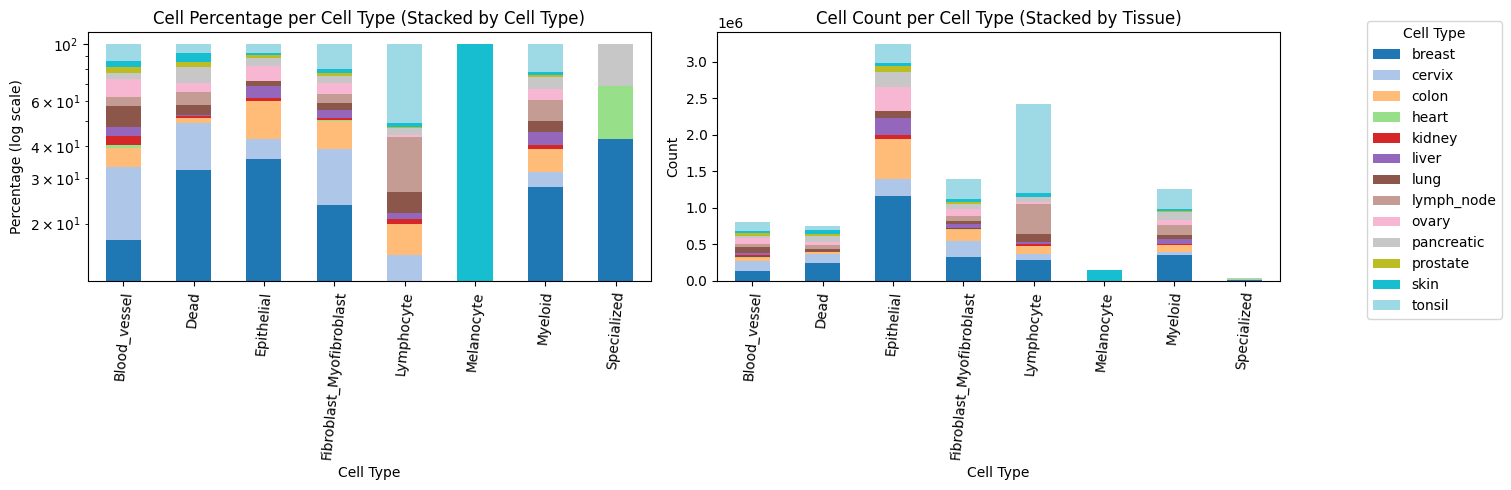

In [8]:
# Cell count per cell type and tissue

annots_ct_2['final_label_training_ct_2'] = annots_ct_2['final_label_cells'].map(label2cat)

df_cell_type_stacked = annots_ct_2.groupby(['final_label_training_ct_2', 'tissue']).size().unstack(fill_value=0)

# Calculate percentage per cell type by tissue
df_cell_type_percentage = df_cell_type_stacked.div(df_cell_type_stacked.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot 1: Stacked bar plot with percentages and log scale
df_cell_type_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Cell Type (Stacked by Cell Type)')
ax1.set_yscale('log')
ax1.set_xlabel('Cell Type')
ax1.set_ylabel('Percentage (log scale)')
ax1.set_xticklabels(df_cell_type_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with counts
df_cell_type_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Cell Type (Stacked by Tissue)')
ax2.set_xlabel('Cell Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_cell_type_stacked.index, rotation=85)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.65), loc='center left')

plt.tight_layout()
plt.show()

## ct_3

**===> Choosing table_cells**

In [3]:
kept_slide_ids = annots['slide_id'].unique()

# Remove "brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"
kept_slide_ids = [x for x in kept_slide_ids if x not in ["brain_s0", "bone_marrow_s0", "bone_marrow_s1", "bone_s0"]]
print("Slide_ids:", kept_slide_ids)
print("Number:", len(kept_slide_ids))
print("Tissues:", annots[annots['slide_id'].isin(kept_slide_ids)]['tissue'].unique())

Slide_ids: ['breast_s0', 'breast_s1', 'breast_s3', 'cervix_s0', 'colon_s1', 'colon_s2', 'heart_s0', 'kidney_s0', 'kidney_s1', 'liver_s0', 'liver_s1', 'breast_s6', 'lymph_node_s0', 'ovary_s0', 'ovary_s1', 'pancreatic_s0', 'pancreatic_s1', 'pancreatic_s2', 'prostate_s0', 'skin_s1', 'skin_s2', 'skin_s3', 'skin_s4', 'tonsil_s0', 'tonsil_s1', 'lung_s1', 'lung_s3']
Number: 27
Tissues: ['breast' 'cervix' 'colon' 'heart' 'kidney' 'liver' 'lymph_node' 'ovary'
 'pancreatic' 'prostate' 'skin' 'tonsil' 'lung']


In [4]:
annots.loc[annots['slide_id'].isin(kept_slide_ids), 'final_label_cells'].unique()

array(['Epithelial', 'Blood_vessel', 'T_NK', 'Myeloid', 'B_Plasma',
       'Fibroblast_Myofibroblast', 'Specialized', 'Less10', 'Unknown',
       'Stem_like', 'Melanocyte'], dtype=object)

In [5]:
# Keep only selected slide_ids
annots_ct_3 = annots[annots['slide_id'].isin(kept_slide_ids)]

In [6]:
label2cat = {"T_NK" : "Immune",
             "B_Plasma" : "Immune",
             "Myeloid" : "Immune",
             "Blood_vessel" : "Stromal",
             "Fibroblast_Myofibroblast" : "Stromal",
             "Epithelial" : "Epithelial",
             "Specialized" : "Other",
             "Melanocyte" : "Melanocyte",
             "Stem_like" : "Other",
             "Unknown" : "Other",
             "Less10" : "Other"
           }


cat2idx = {"Immune" : 0,
          "Stromal" : 1,
          "Epithelial" : 2,
          "Melanocyte" : 3,
          "Other" : 4
          }


cat2color = {"Immune" : [255, 143, 15],          # Orange
            "Stromal" : [156, 255, 36],          # Light Green
            "Epithelial" : [57, 208, 133],       # Blue Green
            "Melanocyte" : [22, 169, 223],       # Blue
            "Other" : [143, 143, 143]            # Grey
          }

In [7]:
# Save dict label2cat in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_3/label2cat.json", "w") as f:
    json.dump(label2cat, f)

# Save dict cat2idx in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_3/cat2idx.json", "w") as f:
    json.dump(cat2idx, f)

# Save dict cat2color in json file
with open("/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/annots/annot_dicts_ct_3/cat2color.json", "w") as f:
    json.dump(cat2color, f)

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_28451/3120097853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annots_ct_3['final_label_training_ct_3'] = annots_ct_3['final_label_cells'].map(label2cat)


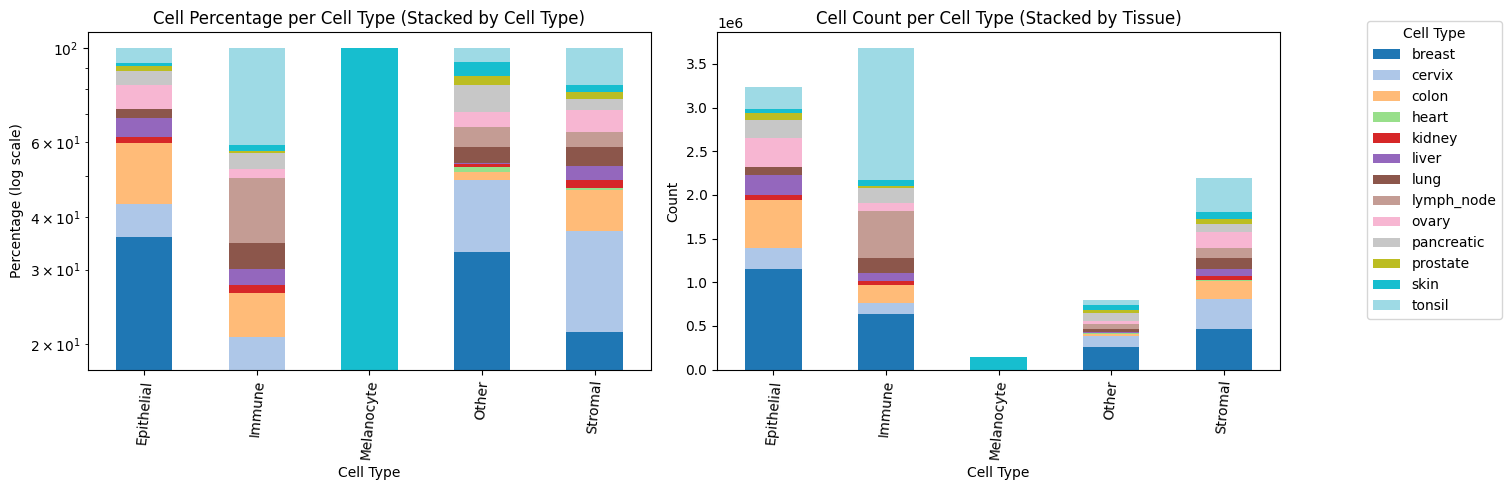

In [8]:
# Cell count per cell type and tissue

annots_ct_3['final_label_training_ct_3'] = annots_ct_3['final_label_cells'].map(label2cat)

df_cell_type_stacked = annots_ct_3.groupby(['final_label_training_ct_3', 'tissue']).size().unstack(fill_value=0)

# Calculate percentage per cell type by tissue
df_cell_type_percentage = df_cell_type_stacked.div(df_cell_type_stacked.sum(axis=1), axis=0) * 100


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot 1: Stacked bar plot with percentages and log scale
df_cell_type_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=ax1, legend=False)

ax1.set_title('Cell Percentage per Cell Type (Stacked by Cell Type)')
ax1.set_yscale('log')
ax1.set_xlabel('Cell Type')
ax1.set_ylabel('Percentage (log scale)')
ax1.set_xticklabels(df_cell_type_percentage.index, rotation=85)

# Plot 2: Stacked bar plot with counts
df_cell_type_stacked.plot(kind='bar', stacked=True, colormap='tab20', ax=ax2, legend=False)

ax2.set_title('Cell Count per Cell Type (Stacked by Tissue)')
ax2.set_xlabel('Cell Type')
ax2.set_ylabel('Count')
ax2.set_xticklabels(df_cell_type_stacked.index, rotation=85)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Cell Type', bbox_to_anchor=(1.05, 0.65), loc='center left')

plt.tight_layout()
plt.show()